In [1]:
#utils.install_packages('package')

import rpy2
from rpy2.robjects.packages import importr

base = importr('base')
utils = importr('utils')
graphics = importr('graphics')
stats    = importr('stats')
grdevices = importr('grDevices')
from rpy2.robjects.lib import grdevices
lattice = importr('lattice')
ggplot2 = importr('ggplot2')
limma = importr('limma')
edger = importr('edgeR')

import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import FloatVector as c
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects import globalenv as var 
rprint = robjects.globalenv.get("print")

r = robjects.r

from IPython.display import Image, display

print(rpy2.__version__)
print(r('.libPaths()')[0])

D:\Users\Emperor Justinian\Anaconda\lib\site-packages\rpy2\robjects\packages.py:347: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn("The symbol '%s' is not in this R namespace/package." % name)


2.8.6
D:/Users/Emperor Justinian/Anaconda/envs/tensorflowprojects/R/library


In [11]:
print(r('edgeRUsersGuide()'))

[1] "D:/Users/Emperor Justinian/Anaconda/envs/tensorflowprojects/R/library/edgeR/doc/edgeRUsersGuide.pdf"



In [21]:
def render(x=None, y=None, width=1024, height=896, res=150, col='green', main='Scatterplot', xlab='plantd', ylab='cobw', pch=19, plot='plot'):

    with grdevices.render_to_bytesio(grdevices.png, 
                                     width=width,
                                     height=height, 
                                     res=res) as img:
        if plot == 'plot':
            graphics.plot(x, y, col=col, main=main, xlab=xlab, ylab=ylab, pch=pch)
        if plot == 'box':
            graphics.boxplot(x, col=col, main=main, xlab=xlab, ylab=ylab, pch=pch)
        if plot == 'biplot':
            stats.biplot(x)
        if plot == 'hclust':
            #clust = stats.hclust(x)
            r('clust <- hclust(dist(t(m), method="eu"))')
            clust = var["clust"]
            graphics.plot(clust)
        if plot == 'prcomp':
            r('pr <- prcomp(m, centre=TRUE, scale.=TRUE)')
            pr = var["pr"]
            graphics.plot(pr)
        if plot == 'plotMDS':
            r('countmds <- plotMDS(countlist)')
        if plot == 'plotMeanVar':
            rcommand = str('{0}').format(str(x).replace("r('", "").replace("')", ""))
            r("plotMeanVar("+ rcommand +")")

    display(Image(data=img.getvalue(), format='png', embed=True))
    
#r("plantd")

In [4]:
r('fDir <- "/Users/Emperor Justinian/Jupyter Notebooks/Bio-Inf R/"')

r('cnts <- read.delim(paste0(fDir,"RNA-Seq-counts.txt"), header=TRUE, sep="\t")') #Ik heb '# Todt (c)' uit de txt verwijderd ivm errors

r('cnts <- cnts[,-1]')

r('m <- as.matrix(cnts)')
print(r('head(m)'))      

     WCFS1.glc.1 WCFS1.glc.2 WCFS1.rib.1 WCFS1.rib.2 NC8.glc.1 NC8.glc.2

[1,]        8100        9599        8144        7000      7117      8278

[2,]       12679       15856       11539       11049     10815     14348

[3,]        1795        1946        1470        1607      1489      1407

[4,]        8538        8740        5699        7402      6497      8565

[5,]       56040       42130       31941       23500     61965     37353

[6,]      105615       90094       60086       52584    103873     91726

     NC8.rib.1 NC8.rib.2

[1,]      7457      6980

[2,]     10552     10735

[3,]      1587      1699

[4,]      6581      8342

[5,]     20498     18188

[6,]     45530     44802



In [65]:
print(r('summary(m)'))

  WCFS1.glc.1        WCFS1.glc.2      WCFS1.rib.1        WCFS1.rib.2    

 Min.   :     0.0   Min.   :     0   Min.   :     0.0   Min.   :     0  

 1st Qu.:   271.5   1st Qu.:   272   1st Qu.:   275.5   1st Qu.:   308  

 Median :   960.0   Median :  1016   Median :   993.0   Median :  1086  

 Mean   :  4575.8   Mean   :  4784   Mean   :  4037.4   Mean   :  4209  

 3rd Qu.:  2954.5   3rd Qu.:  3180   3rd Qu.:  2853.5   3rd Qu.:  3136  

 Max.   :304949.0   Max.   :348490   Max.   :299861.0   Max.   :309971  

   NC8.glc.1          NC8.glc.2          NC8.rib.1        NC8.rib.2     

 Min.   :     0.0   Min.   :     0.0   Min.   :     0   Min.   :     0  

 1st Qu.:   235.5   1st Qu.:   271.5   1st Qu.:   295   1st Qu.:   315  

 Median :   950.0   Median :  1045.0   Median :  1070   Median :  1133  

 Mean   :  4426.2   Mean   :  4624.6   Mean   :  4485   Mean   :  4487  

 3rd Qu.:  2873.5   3rd Qu.:  3240.0   3rd Qu.:  3226   3rd Qu.:  3386  

 Max.   :306306.0   Max.   :307691.0  

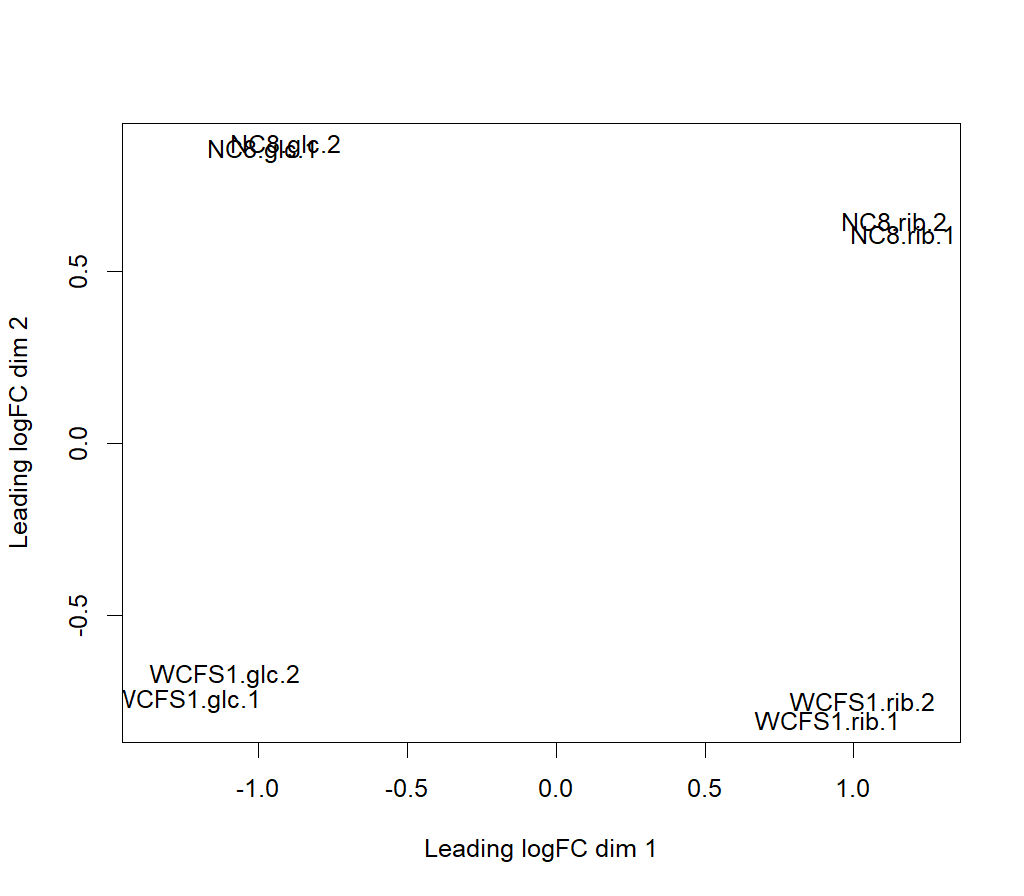

Coefficient:  group2 

         logFC    logCPM       LR        PValue           FDR

2198  8.193253 12.115917 778.7631 2.235732e-171 4.885075e-168

2199  8.046395 11.024284 623.0860 1.594272e-137 1.741742e-134

1346  6.015148 11.157090 563.0087 1.862614e-124 1.356604e-121

172  -6.298680  6.786747 549.5616 1.568084e-121 8.565661e-119

2200  8.229488 11.386520 545.5935 1.144408e-120 5.001065e-118

1347  6.073605 11.033617 457.4013 1.767695e-101  6.437357e-99

523   4.262338  6.761784 438.7995  1.975729e-97  6.167097e-95

1348  6.000716 10.441068 418.8745  4.289655e-93  1.171612e-90

162   4.210985  6.667111 408.7689  6.793726e-91  1.649366e-88

1349  5.861295 10.206682 393.7306  1.275671e-87  2.787342e-85



In [5]:
r('group <- factor(c(1,1,2,2,1,1,2,2))')
r('countlist <- DGEList(counts=cnts, group=group)')
r('keep <- filterByExpr(countlist)') 
r('countlist <- countlist[keep, keep.lib.sizes=FALSE]')
r('countlist <- calcNormFactors(countlist)') # Possibly add Yuen's t-test
render(r('countlist'), main='mds', plot='plotMDS')
r('design <- model.matrix(~group)')
r('GLMcomdisp <- estimateGLMCommonDisp(countlist, design)')
r('GLMtrenddisp <- estimateGLMTrendedDisp(countlist, design)')
r('GLMtagdisp <- estimateGLMTagwiseDisp(GLMcomdisp, design)')
r('countlist <- estimateDisp(countlist)')
r('fit <- glmFit(countlist,design)')
r('lrt <- glmLRT(fit,coef=2)')
print(r('topTags(lrt)'))

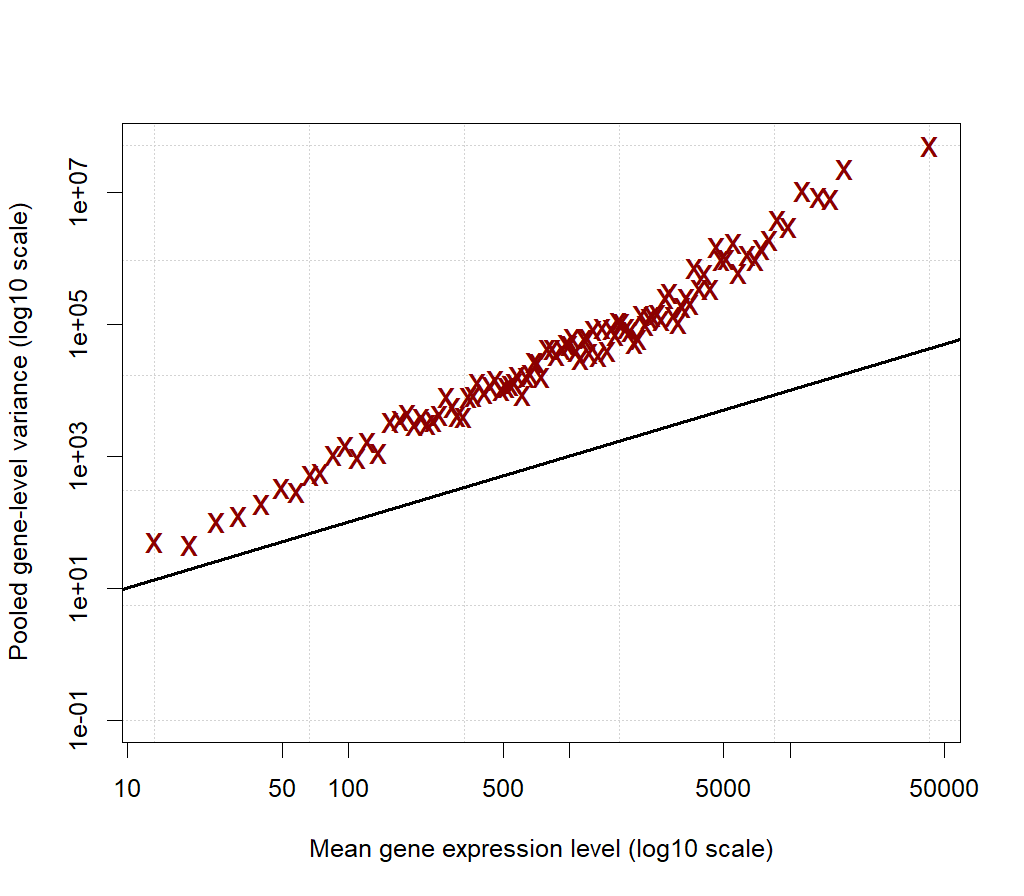

In [22]:
render('GLMcomdisp', main='mean var', plot='plotMeanVar')

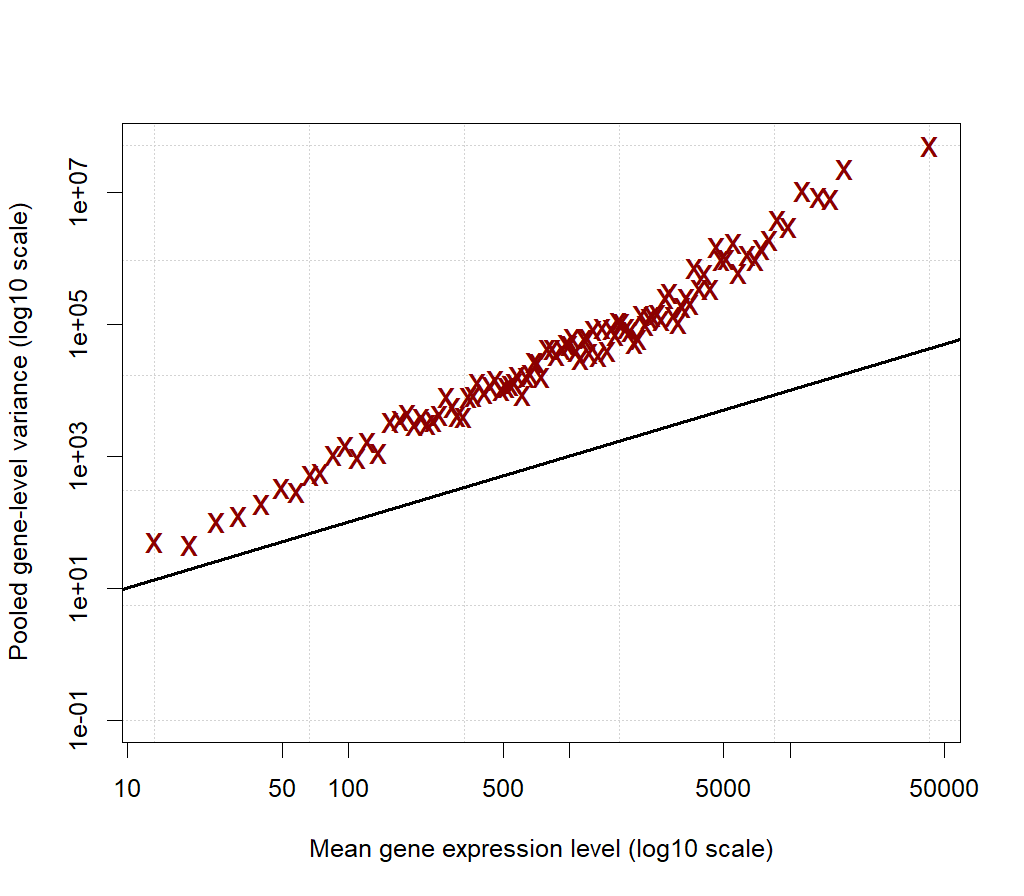

In [23]:
render('GLMtagdisp', main='mean var', plot='plotMeanVar')

In [86]:
print(r('countlist'))

An object of class "DGEList"

$counts

  WCFS1.glc.1 WCFS1.glc.2 WCFS1.rib.1 WCFS1.rib.2 NC8.glc.1 NC8.glc.2 NC8.rib.1

1        8100        9599        8144        7000      7117      8278      7457

2       12679       15856       11539       11049     10815     14348     10552

3        1795        1946        1470        1607      1489      1407      1587

4        8538        8740        5699        7402      6497      8565      6581

5       56040       42130       31941       23500     61965     37353     20498

  NC8.rib.2

1      6980

2     10735

3      1699

4      8342

5     18188

2180 more rows ...



$samples

            group lib.size norm.factors

WCFS1.glc.1     1 10153522    0.9854479

WCFS1.glc.2     1 10615211    0.9831848

WCFS1.rib.1     2  8958865    0.9975857

WCFS1.rib.2     2  9339919    1.0370108

NC8.glc.1       1  9821408    0.9382002

NC8.glc.2       1 10261718    1.0164720

NC8.rib.1       2  9951796    0.9911305

NC8.rib.2       2  9957304    1.05554

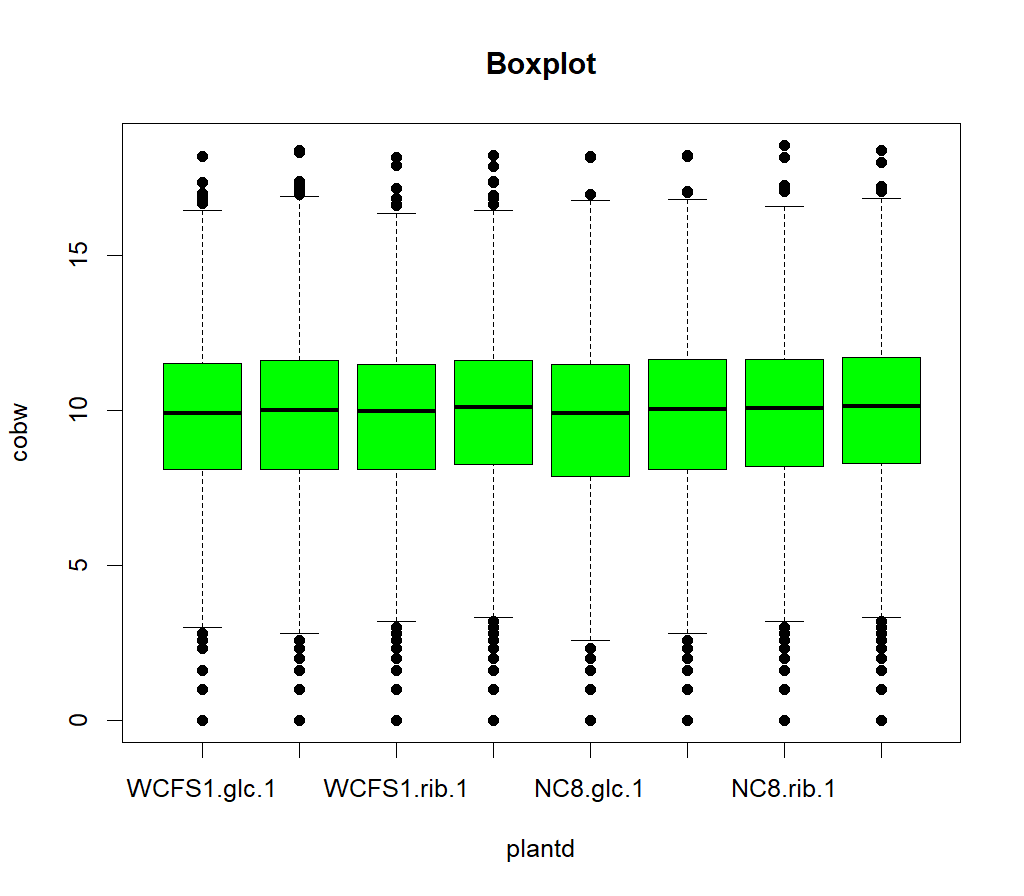

In [23]:
r('lm <- log2(m+1)')

r('lm <- na.omit(lm)')
r('m <- na.omit(m)')

r('pdf(paste0(fDir,"res.pdf"),width=10,height=10)')
 
render(r('lm'), main='Boxplot', plot='box')

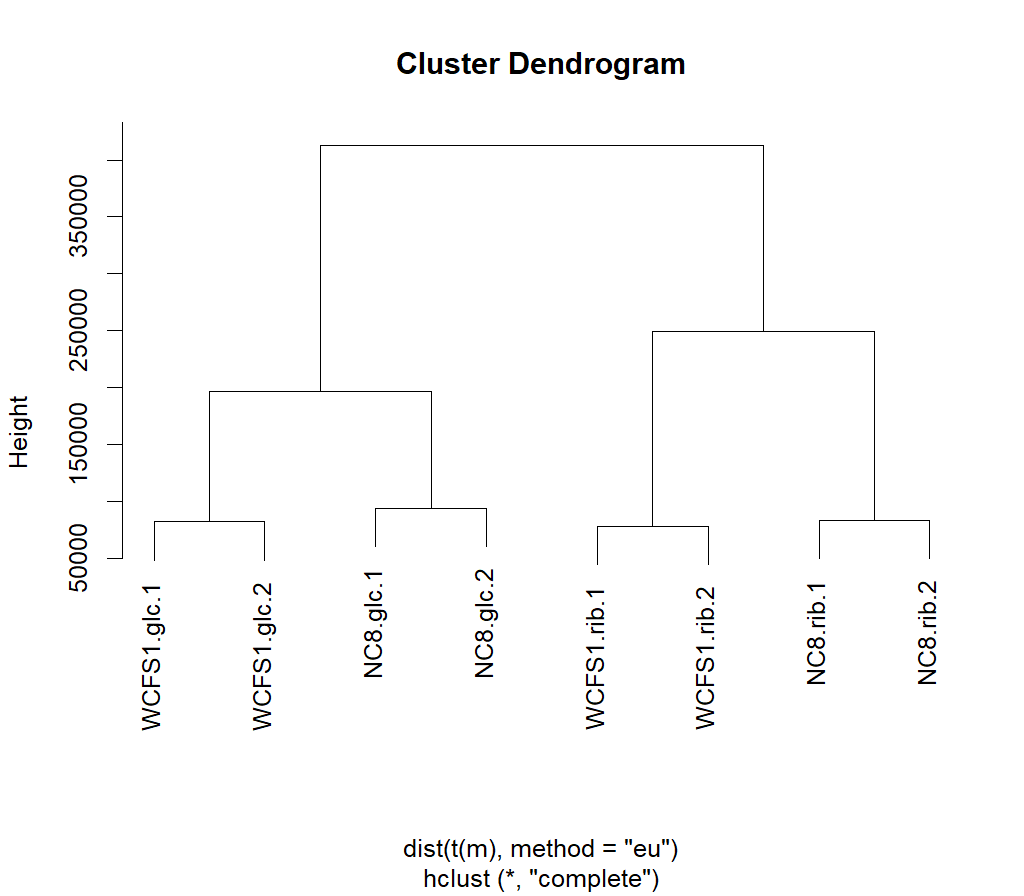

In [89]:
render(r('dist(t(m))'), plot='hclust')

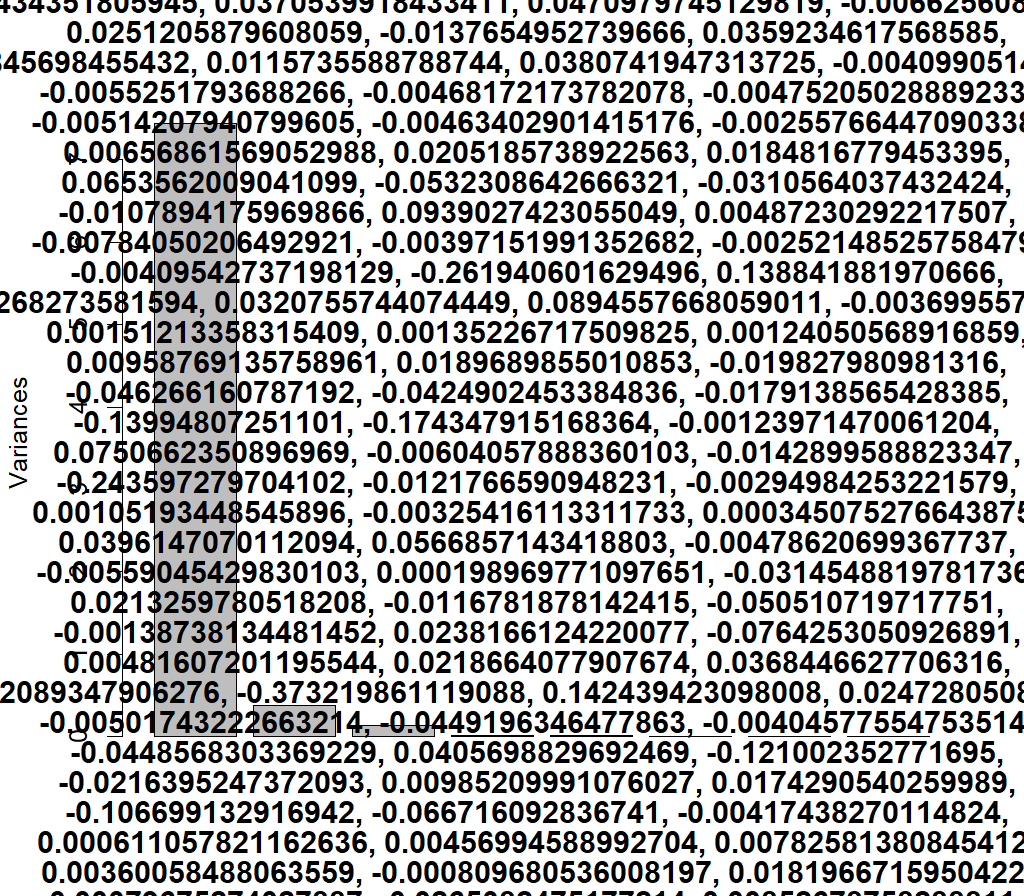

In [90]:
render(r('m'), plot='prcomp')

In [27]:
print(r('summary(pr)'))

Importance of components:

                          PC1     PC2     PC3     PC4     PC5     PC6     PC7

Standard deviation     2.7286 0.61703 0.37343 0.11847 0.10739 0.07745 0.04194

Proportion of Variance 0.9307 0.04759 0.01743 0.00175 0.00144 0.00075 0.00022

Cumulative Proportion  0.9307 0.97828 0.99571 0.99747 0.99891 0.99966 0.99988

                           PC8

Standard deviation     0.03131

Proportion of Variance 0.00012

Cumulative Proportion  1.00000



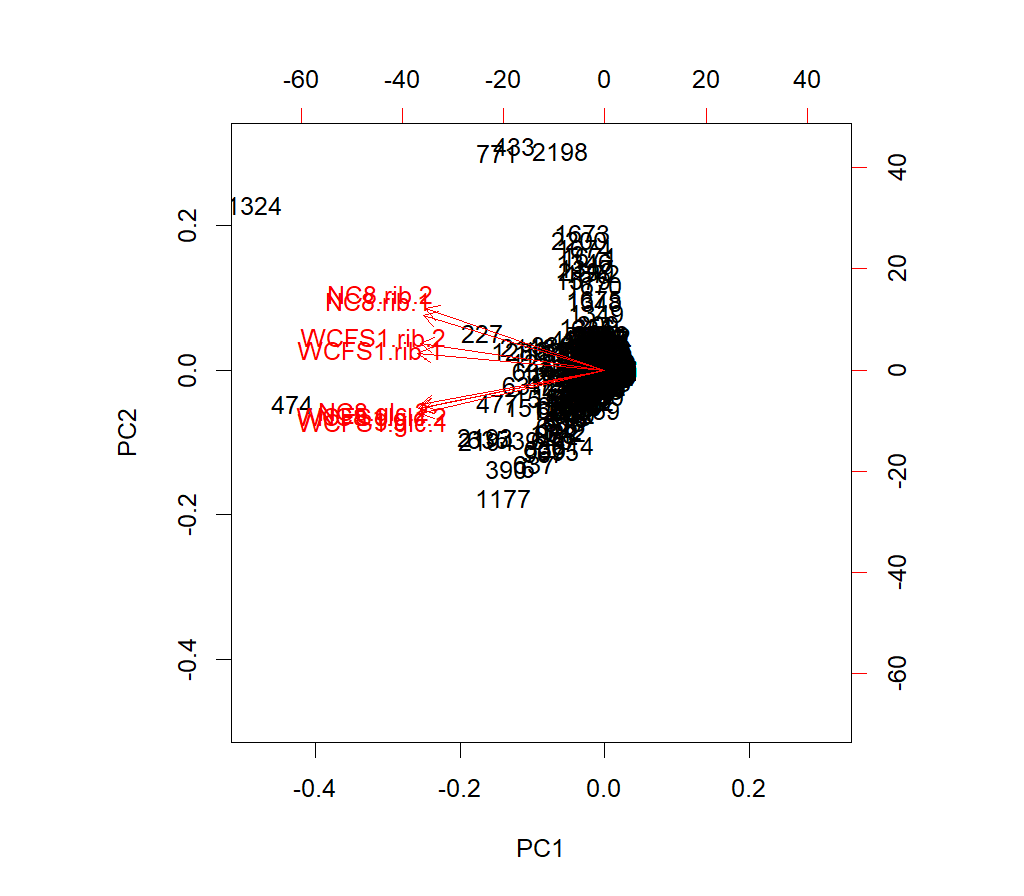

In [29]:
render(r('pr'), plot='biplot')
r('dev.off()'); # De ; is belangrijk zodat hij geen extra output cell geeft